In [1]:
import sympy as sm
from sympy.utilities import lambdify

\begin{equation}
\\ \phi_0(x) = 
\begin{cases} 
\\ \frac{h - x}{h} & \:  h i  \leq x \leq h \left(i + 1\right) \\0 & \text{otherwise}
\end{cases}   \hspace{10mm} 
\end{equation}

\begin{equation}
\\ \phi_i(x) = 
\begin{cases} 
\frac{- h \left(i - 1\right) + x}{h} & \:  h \left(i - 1\right)  \leq x  \leq h i \\\frac{h \left(i + 1\right) - x}{h} &\:  h i  \leq x \leq h \left(i + 1\right) \\0 & \text{otherwise}
\end{cases}   \hspace{10mm} \text{for all i in 2 ... N- 1}
\end{equation}

\begin{equation}
\\ \phi_N(x) = 
\begin{cases} 
\frac{- h \left(N - 1\right) + x}{h} & \:  h \left(N - 1\right)  \leq x  \leq h N \\0 & \text{otherwise}
\end{cases}   \hspace{10mm} 
\end{equation}

In [2]:
h, x, t = sm.Symbol("h", positive=True), sm.Symbol("x", nonnegative=True), sm.Symbol("x", nonnegative=True)

In [3]:
from functools import lru_cache

@lru_cache()
def phi(i, N = 6):
    if i == 0 :
        return sm.Piecewise( ( ( -x + (i+1)*h) / h, (x >=i*h) & (x <= (i+1)*h)) , \
                           (0, True) 

                      )
    elif i == N:
        return sm.Piecewise(  ((x - (i-1)*h) / h, (x >=(i-1)*h) & (x <= i*h))   , \
                   (0, True) 
                                       )             
    else:
        return sm.Piecewise(
                           ((x - (i-1)*h) / h, (x >=h*(i-1)) & (x <= i*h))    , \
                           ( ( -x + (i+1)*h) / h, (x >=i*h) & (x <= (i+1)*h)) , \
                           (0, True)  
                       )



In [4]:
ld = .005
k = .2
b = .5
x0 = 10
t = sm.symbols("t")
g_0 = ld - 2*k*b*(1/sm.tanh(k*x0 - ld*t))
g_1 = ld - 2*k*b*(1/sm.tanh(k*(1 + x0) - ld*t))
h_0 = -2*k*ld*b*(1/sm.sinh(k*x0 - ld*t))**2
h_1 = -2*k*ld*b*(1/sm.sinh(k*(1 + x0) - ld*t))**2
dg_0 = sm.apart((g_0.diff(t)))
dg_1 = sm.apart((g_1.diff(t)))
dh_0 = h_0.diff(t)
dh_1 = h_1.diff(t)
g_0 = lambdify(t, g_0)
g_1 = lambdify(t, g_1)
h_0 = lambdify(t, h_0)
h_1 = lambdify(t, h_1)
dg_0 = lambdify(t, dg_0)
dg_1 = lambdify(t, dg_1)
dh_0 = lambdify(t, dh_0)
dh_1 = lambdify(t, dh_1)
N = 5


In [5]:
[phi(8, 8).diff(x).subs(x, 8*h) * phi(i, 8).subs(x, 8*h) -phi(0, 8).diff(x).subs(x, 0) * phi(i, 8).subs(x, 0)  for i in range(0, 9)]  

[1/h, 0, 0, 0, 0, 0, 0, 0, 1/h]

In [6]:
[phi(8, 8).diff(x).subs(x, 0) * phi(i, 8).subs(x, 8*h)  for i in range(0, 9)]  

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
#A int phi * phi
sm.Matrix(N+1, N+1, lambda j, i: sm.integrate(phi(i, N)*phi(j, N), (x, 0, (N)*h)))[1:-1, 1:-1]

Matrix([
[2*h/3,   h/6,     0,     0],
[  h/6, 2*h/3,   h/6,     0],
[    0,   h/6, 2*h/3,   h/6],
[    0,     0,   h/6, 2*h/3]])

In [8]:
#Btop
sm.Matrix(N+1, N+1, lambda j, i: sm.integrate(phi(0, N).diff(x)*phi(i, N)*phi(j, N), (x, 0, (N)*h)))[1:-1, 1:-1]

Matrix([
[-1/3, 0, 0, 0],
[   0, 0, 0, 0],
[   0, 0, 0, 0],
[   0, 0, 0, 0]])

In [9]:
#Bbottom
sm.Matrix(N+1, N+1, lambda j, i: sm.integrate(phi(N, N).diff(x)*phi(i, N)*phi(j, N), (x, 0, (N)*h)))[1:-1, 1:-1]

Matrix([
[0, 0, 0,   0],
[0, 0, 0,   0],
[0, 0, 0,   0],
[0, 0, 0, 1/3]])

In [10]:
#Bleft
sm.Matrix(N+1, N+1, lambda j, k: sm.integrate(phi(0, N)*phi(k, N).diff(x)*phi(j, N), (x, 0, (N)*h)))[1:-1, 1:-1]

Matrix([
[1/6, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0]])

In [11]:
#Bright
sm.Matrix(N+1, N+1, lambda j, k: sm.integrate(phi(N, N)*phi(k, N).diff(x)*phi(j, N), (x, 0, (N)*h)))[1:-1, 1:-1]

Matrix([
[0, 0, 0,    0],
[0, 0, 0,    0],
[0, 0, 0,    0],
[0, 0, 0, -1/6]])

In [12]:
#C
sm.Matrix(N+1, N+1, lambda j, i: sm.integrate(phi(i, N).diff(x)*phi(j, N), (x, 0, (N)*h)))[1:-1, 1:-1]

Matrix([
[   0,  1/2,    0,   0],
[-1/2,    0,  1/2,   0],
[   0, -1/2,    0, 1/2],
[   0,    0, -1/2,   0]])

In [13]:
#D
sm.Matrix(N+1, N+1, lambda j, i: sm.integrate(phi(i, N).diff(x)*phi(j, N).diff(x), (x, 0, (N)*h)))[1:-1, 1:-1]

Matrix([
[ 2/h, -1/h,    0,    0],
[-1/h,  2/h, -1/h,    0],
[   0, -1/h,  2/h, -1/h],
[   0,    0, -1/h,  2/h]])

In [14]:
constants = [sm.Matrix(N+1, 1, lambda j, i: sm.Integral(phi(0, N)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.Integral(phi(N, N)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.Integral(phi(0, N).diff(x)*phi(0, N)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.Integral(phi(N, N).diff(x)*phi(0, N)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.Integral(phi(N, N)*phi(0, N).diff(x)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.Integral(phi(N, N)*phi(N, N).diff(x)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.Integral(phi(0, N).diff(x)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.Integral(phi(N, N).diff(x)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.Integral(phi(0, N).diff(x)*phi(j, N).diff(x), (x, 0, (N)*h)))[1:-1],
sm.Matrix(N+1, 1, lambda j, i: sm.Integral(phi(N, N).diff(x)*phi(j, N).diff(x), (x, 0, (N)*h)))[1:-1],
sm.Matrix(N+1, 1, lambda j, i: phi(N, N).diff(x)*phi(j, N)).subs(x, N*h)[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: phi(0, N).diff(x)*phi(j, N)).subs(x, 0)[1:-1], ]


In [20]:
constants = [sm.Matrix(N+1, 1, lambda j, i: sm.integrate(phi(0, N)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.integrate(phi(N, N)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.integrate(phi(0, N).diff(x)*phi(0, N)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.integrate(phi(N, N).diff(x)*phi(0, N)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.integrate(phi(N, N)*phi(0, N).diff(x)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.integrate(phi(N, N)*phi(N, N).diff(x)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.integrate(phi(0, N).diff(x)*phi(0, N)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.integrate(phi(N, N).diff(x)*phi(0, N)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.integrate(phi(N, N)*phi(0, N).diff(x)*phi(j, N), (x, 0, (N)*h)))[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: sm.integrate(phi(N, N)*phi(N, N).diff(x)*phi(j, N), (x, 0, (N)*h)))[1:-1],     
             
sm.Matrix(N+1, 1, lambda j, i: sm.integrate(phi(0, N).diff(x)*phi(j, N).diff(x), (x, 0, (N)*h)))[1:-1],
sm.Matrix(N+1, 1, lambda j, i: sm.integrate(phi(N, N).diff(x)*phi(j, N).diff(x), (x, 0, (N)*h)))[1:-1],
 
sm.Matrix(N+1, 1, lambda j, i: phi(N, N).diff(x)*phi(j, N)).subs(x, N*h)[1:-1], 
sm.Matrix(N+1, 1, lambda j, i: phi(0, N).diff(x)*phi(j, N)).subs(x, 0)[1:-1], ]


In [21]:
for i in constants:
    print(i)

[h/6, 0, 0, 0]
[0, 0, 0, h/6]
[-1/6, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 1/6]
[-1/6, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 1/6]
[-1/h, 0, 0, 0]
[0, 0, 0, -1/h]
[-1/h, 0, 0, 0]
[0, 0, 0, -1/h]
[0, 0, 0, 0]
[0, 0, 0, 0]


In [16]:
sm.Matrix(N+1, 1, lambda j, _:sm.Matrix(N+1, N+1, lambda  k, i: sm.integrate(phi(i, N)*phi(j, N)*phi(k, N).diff(x), (x, 0, (N)*h)) if all([abs(i-j)<=1,abs(k-j)<=1,abs(i-k)<=1  ]) else 0)[1:-1, 1:-1])[1:-1]

[Matrix([
 [  0, -1/6, 0, 0],
 [1/3,  1/6, 0, 0],
 [  0,    0, 0, 0],
 [  0,    0, 0, 0]]), Matrix([
 [-1/6, -1/3,    0, 0],
 [ 1/6,    0, -1/6, 0],
 [   0,  1/3,  1/6, 0],
 [   0,    0,    0, 0]]), Matrix([
 [0,    0,    0,    0],
 [0, -1/6, -1/3,    0],
 [0,  1/6,    0, -1/6],
 [0,    0,  1/3,  1/6]]), Matrix([
 [0, 0,    0,    0],
 [0, 0,    0,    0],
 [0, 0, -1/6, -1/3],
 [0, 0,  1/6,    0]])]

In [17]:
############end

In [18]:
def intgA(i, j):
    if i == j == 0:
         return sm.integrate(phi(i)**2, (x,(i)*h, (i+1)*h)) 
    elif i == j == N:
        return sm.integrate(phi(i)**2, (x,(i-1)*h, i*h))
    elif i == j:
        return sm.integrate(phi(i)**2, (x,(i-1)*h, i*h)) + sm.integrate(phi(i)**2, (x,(i)*h, (i+1)*h)) 
    elif i > j:
        return sm.integrate(phi(i) * phi(j), (x,(i-1)*h, i*h)) 
    else:
        return sm.integrate(phi(i) * phi(j),(x,(i)*h, (i+1)*h)) 
        

In [19]:
def intgB(k, i, j):
    if all([abs(i-j)  in [0, 1],  abs(j-k) in [0, 1], abs(k - i) in [0, 1]]):

        if i == j == k == 0:
             return sm.integrate(phi(k)*phi(i)*phi(j).diff(x), (x,(i)*h, (i+1)*h)) 
        elif i == j == k == N:
            return sm.integrate(phi(k)*phi(i)*phi(j).diff(x), (x,(i-1)*h, i*h))
        elif i == j == k:
            return sm.integrate(phi(k)*phi(i)*phi(j).diff(x), (x,(i-1)*h, i*h)) + sm.integrate(phi(k)*phi(i)*phi(j).diff(x), (x,(i)*h, (i+1)*h)) 
        elif i > j or i > k:
            return sm.integrate(phi(k)*phi(i)*phi(j).diff(x), (x,(i-1)*h, i*h)) 
        else:
            return sm.integrate(phi(k)*phi(i) * phi(j).diff(x),(x,(i)*h, (i+1)*h)) 
    else:
        return 0

In [18]:
a = sm.Matrix(N+1, N+1, lambda j, i: intgA(i, j))
ainv = a.inv()

In [19]:
[(phi(0)*phi(i).diff(x)).subs(x,0) for  i in range(6)]

In [ ]:
ainv

In [ ]:
sm.Matrix([phi(i) for i in range(6)]).T

In [7]:
def intgC(i, j):
    if i == j == 0:
         return sm.integrate(phi(i)*phi(j).diff(x), (x,(i)*h, (i+1)*h)) 
    elif i == j == N:
        return sm.integrate(phi(i)*phi(j).diff(x), (x,(i-1)*h, i*h))
    elif i == j:
        return sm.integrate(phi(i)*phi(j).diff(x), (x,(i-1)*h, i*h)) + sm.integrate(phi(i)*phi(j).diff(x), (x,(i)*h, (i+1)*h)) 
    elif i > j:
        return sm.integrate(phi(i)*phi(j).diff(x), (x,(i-1)*h, i*h)) 
    else:
        return sm.integrate(phi(i)*phi(j).diff(x),(x,(i)*h, (i+1)*h)) 
        

In [8]:
sm.Matrix(N+1, N+1, lambda i, j:intgC(i, j))

TypeError: phi() missing 1 required positional argument: 'N'

In [ ]:
def intgD(i, j):
    if i == j == 0:
         return sm.simplify(phi(i)*phi(j).diff(x))
    elif i == j == N:
        return sm.simplify(phi(i)*phi(j).diff(x))
    elif i == j:
        return sm.simplify(phi(i)*phi(j).diff(x)) + sm.simplify(phi(i)*phi(j).diff(x))
    elif i > j:
        return sm.simplify(phi(i)*phi(j).diff(x))
    else:
        return sm.simplify(phi(i)*phi(j).diff(x))
        

sm.Matrix(N+1, 1, lambda k, _:sm.Matrix(N+1, N+1, lambda i, j:intgB(k,i, j)))

sm.Matrix(N+1, N+1, lambda i, j:intgD(i, j))

sm.simplify(phi(0)*phi(0).diff(x))

In [7]:
x, t, k, beta, i, j , h= sm.symbols("x t k beta i j H")
N = sm.symbols("N")

In [10]:
u = sm.exp(t) * sm.sin(x)
u

In [11]:
expr = u.diff(t)  + u*u.diff(x) +beta* u.diff(x, 2) 

In [ ]:
pos = sm.expand(sm.integrate(expr*((x-(k-1)*h)/h), (x, h*(k-1),h*k)))
neg = sm.expand(sm.integrate(expr*(-(x-(k+1)*h)/h), (x, h*(k),h*(k+1))))


In [ ]:
pos1= pos.coeff(t)
pos2= pos.coeff(t**2)



In [ ]:
pos1

In [ ]:
neg1= neg.coeff(t)
neg2= neg.coeff(t**2)

In [ ]:
neg1

In [ ]:

(lambdastr(k,       factor(simplify(neg1.subs(k, 0)))            ).replace("H","self.H").replace("beta","self.beta"), 
 
 lambdastr(k, factor(simplify(neg2.subs(k, 0)))     )   .replace("H","self.H").replace("beta","self.beta"))

In [ ]:
(lambdastr(k,sm.factor(simplify(pos1.subs(k, N).subs(N*h, 1)))).replace("H","self.H").replace("beta","self.beta"), 
 
 lambdastr(k,sm.factor(simplify(pos2.subs(k, N).subs(N*h, 1)))).replace("H","self.H").replace("beta","self.beta"))

In [ ]:

(lambdastr(k,       factor(simplify(neg1+pos1) )           ).replace("H","self.H").replace("beta","self.beta"), 
 
 lambdastr(k, factor(simplify(neg2+pos2)     ))   .replace("H","self.H").replace("beta","self.beta"))

In [2]:
ld, alpha, beta, k, x,x0, t = sm.symbols("lambda alpha beta k x x_0 t")

In [3]:
B = sm.sqrt(alpha + beta**2)
xi = x0 + x
expr = ld - (2 * B * k)/sm.tanh(k * xi - ld * t)

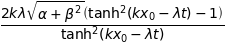

In [13]:
sm.simplify(expr.diff(t)).subs(x, 0)

In [4]:
lambdastr(t, sm.simplify(sm.factor(expr.diff(t))).subs(x,1))


'lambda t: (2*k*lambda_*sqrt(alpha + beta**2) - 2*k*lambda_*sqrt(alpha + beta**2)/math.tanh(k*x_0 + k - lambda_*t)**2)'

In [14]:
expr1 = -2*B*(B + beta) * (k/sm.sinh(k * xi  - ld* t))**2
        

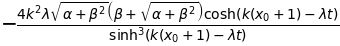

In [15]:
 sm.simplify(expr1.diff(t)).subs(x, 1)

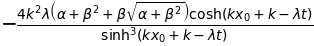

In [7]:
sm.simplify(sm.factor(expr1.diff(t))).subs(x,1)


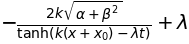

In [5]:
expr